In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

In [5]:
df_noGeo_Tokyo = pd.read_csv('/home/is/shuntaro-o/dev/persons_move_analysis/data/use_new_model/202271month_per_hour_noGeo_adEstimate_Tokyo_ad2zimethestimate.csv')

In [7]:
df_noGeo_Tokyo_station = df_noGeo_Tokyo[df_noGeo_Tokyo['TOKYO_code_estimated']==533946]

In [10]:
df_geotaged_Tokyo_station["created_at"]=df_geotaged_Tokyo_station["created_at"].astype(str)
df_geotaged_Tokyo_station = df_geotaged_Tokyo_station.reset_index(drop=True)
created_time=df_geotaged_Tokyo_station.created_at.values
creatid_at_day_list = []
creatid_at_hour_list = []
for i in created_time:
    creatid_at_day_list.append(i[8:10])
    creatid_at_hour_list.append(i[11:13])
creatid_at_day_list = pd.Series(creatid_at_day_list)
creatid_at_hour_list = pd.Series(creatid_at_hour_list)
df_geotaged_Tokyo_station=pd.concat([df_geotaged_Tokyo_station,creatid_at_day_list],axis=1)
df_geotaged_Tokyo_station=df_geotaged_Tokyo_station.rename(columns={0: 'creatid_at_day'})
df_geotaged_Tokyo_station=pd.concat([df_geotaged_Tokyo_station,creatid_at_hour_list],axis=1)
df_geotaged_Tokyo_station=df_geotaged_Tokyo_station.rename(columns={0: 'creatid_at_hour'})

/tmp/ipykernel_4985/1131681189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geotaged_Tokyo_station["created_at"]=df_geotaged_Tokyo_station["created_at"].astype(str)


In [12]:
day_list = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [13]:
df_geotaged_Tokyo_station = df_geotaged_Tokyo_station[df_geotaged_Tokyo_station['creatid_at_day'].isin(day_list)]
df_geotaged_Tokyo_station = df_geotaged_Tokyo_station[df_geotaged_Tokyo_station['creatid_at_hour'].isin(hour_list)]

In [14]:
df_geotaged_Tokyo_station['created_at'] = pd.to_datetime(df_geotaged_Tokyo_station['created_at'],format="%Y-%m-%d_%H:%M:%S")

In [16]:
df_geotaged_Tokyo_station = df_geotaged_Tokyo_station.dropna(subset=['created_at'])

In [17]:
list_tweet_range = []
for day in day_list:
    day = int(day)
    df_perday = df_geotaged_Tokyo_station[(df_geotaged_Tokyo_station['created_at'].dt.day==day)]
    list_tweet_range_per_day = []
    for hour in hour_list:
        hour = int(hour)
        end_time = df_perday[(df_perday['created_at'].dt.hour==hour)].head(1)['created_at'].values
        start_time = df_perday[(df_perday['created_at'].dt.hour==hour)].tail(1)['created_at'].values
        delta = int(end_time-start_time)*(10**(-9))
        #print(f"{start_time} {end_time} {delta}")
        list_tweet_range_per_day.append(delta)
    list_tweet_range.append(list_tweet_range_per_day)

In [18]:
list_tweets_count = []
for day in day_list:
    day = int(day)
    df_perday = df_geotaged_Tokyo_station[(df_geotaged_Tokyo_station['created_at'].dt.day==day)]
    dict_count_per_hour = df_perday["creatid_at_hour"].value_counts(sort=False).to_dict()
    list_tweets_count_per_hour = []
    for hour in hour_list:
        if hour in dict_count_per_hour:
            list_tweets_count_per_hour.append(dict_count_per_hour[hour])
        else:
            list_tweets_count_per_hour.append(0)
    list_tweets_count.append(list_tweets_count_per_hour)

In [19]:
list_tweet_range = np.array(list_tweet_range)
list_tweets_count = np.array(list_tweets_count)
estimate = list_tweets_count*(3600/list_tweet_range)

Text(69.0, 0.5, 'day')

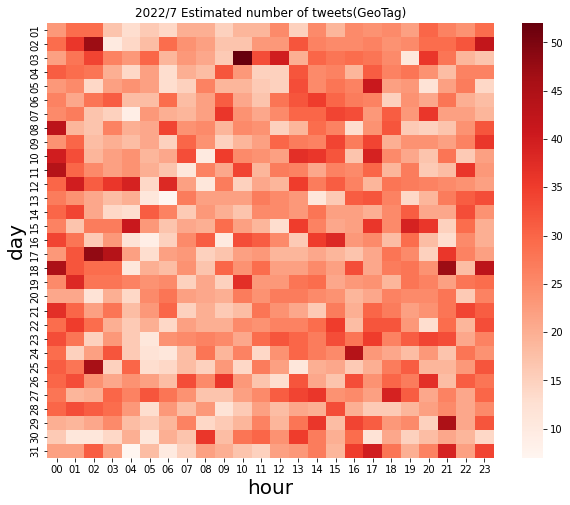

In [21]:
plt.subplots(facecolor="white",figsize=(10,8))
heatmap = sns.heatmap(list_tweets_count,xticklabels=hour_list, yticklabels=day_list, cmap="Reds")
heatmap.set_title('2022/7 Estimated number of tweets(GeoTag)')
heatmap.set_xlabel('hour',fontsize=20)
heatmap.set_ylabel('day',fontsize=20)